In [1]:
#    Next Word Prediction

In [2]:
import numpy as np
import pandas as pd

C:\Users\tridi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#loading the data

text= open('1661-0.txt',encoding='UTF-8').read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [4]:
from nltk.tokenize import RegexpTokenizer

In [5]:
#splitting dataset into one word each

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [6]:
#making list of sorted unique words

unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [7]:
#feature Engineering and OneHotEncoding

WORD_LENGTH=5
prev_words=[]
next_words=[]
for i in range(len(words)-WORD_LENGTH):
    prev_words.append(words[i:i+WORD_LENGTH])
    next_words.append(words[i+WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [8]:
#storing features and corresponding labels

x=np.zeros((len(prev_words),WORD_LENGTH,len(unique_words)),dtype=bool)
y=np.zeros((len(next_words),len(unique_words)),dtype=bool)

for i,each_words in enumerate(prev_words):
    for j,each_word in enumerate(each_words):
        x[i,j, unique_word_index[each_word]]=1
    y[i,unique_word_index[next_words[i]]]=1

In [9]:
print(x[4][0])

[False False False ... False False False]


In [10]:
from keras.models import load_model,Sequential
from keras.layers import LSTM
from keras.layers.core import Dense,Activation
from tensorflow.keras.optimizers import RMSprop

In [11]:
# building the model

model=Sequential()
model.add(LSTM(128,input_shape=(WORD_LENGTH,len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               4264960   
                                                                 
 dense (Dense)               (None, 8201)              1057929   
                                                                 
 activation (Activation)     (None, 8201)              0         
                                                                 
Total params: 5,322,889
Trainable params: 5,322,889
Non-trainable params: 0
_________________________________________________________________


In [13]:
#create the optimizer

optimizer = RMSprop(lr=0.01)

C:\Users\tridi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# compiling  the model

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [15]:
#training the model

history = model.fit(x, y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10
811/811 [==============================] - 159s 191ms/step - loss: 6.0140 - accuracy: 0.1065 - val_loss: 7.0234 - val_accuracy: 0.1022
Epoch 2/10
811/811 [==============================] - 168s 207ms/step - loss: 5.7839 - accuracy: 0.1478 - val_loss: 7.9116 - val_accuracy: 0.1031
Epoch 3/10
811/811 [==============================] - 187s 231ms/step - loss: 5.7496 - accuracy: 0.1755 - val_loss: 7.9284 - val_accuracy: 0.1062
Epoch 4/10
811/811 [==============================] - 207s 255ms/step - loss: 5.4204 - accuracy: 0.2102 - val_loss: 8.1944 - val_accuracy: 0.0992
Epoch 5/10
811/811 [==============================] - 217s 268ms/step - loss: 5.0814 - accuracy: 0.2497 - val_loss: 8.3239 - val_accuracy: 0.1005
Epoch 6/10
811/811 [==============================] - 218s 268ms/step - loss: 4.7912 - accuracy: 0.2891 - val_loss: 8.4579 - val_accuracy: 0.0917
Epoch 7/10
811/811 [==============================] - 203s 251ms/step - loss: 4.5003 - accuracy: 0.3309 - val_loss: 9.0164 -

In [16]:
#saving the model

import pickle
import heapq

In [17]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [18]:
history

{'loss': [6.014045715332031,
  5.783892631530762,
  5.749584197998047,
  5.420408248901367,
  5.0814056396484375,
  4.79118537902832,
  4.5003437995910645,
  4.245604515075684,
  4.0383100509643555,
  3.8835670948028564],
 'accuracy': [0.10648714751005173,
  0.14775586128234863,
  0.17554140090942383,
  0.21019862592220306,
  0.24968436360359192,
  0.2890737056732178,
  0.330872505903244,
  0.37006911635398865,
  0.40484198927879333,
  0.4359429180622101],
 'val_loss': [7.023428440093994,
  7.911618232727051,
  7.928402423858643,
  8.194436073303223,
  8.323945999145508,
  8.457944869995117,
  9.016399383544922,
  9.183624267578125,
  9.348711013793945,
  9.392136573791504],
 'val_accuracy': [0.10216037929058075,
  0.1030757948756218,
  0.10618820786476135,
  0.0992310494184494,
  0.10051263123750687,
  0.09172464162111282,
  0.08183815330266953,
  0.08495056629180908,
  0.07982423901557922,
  0.07469791173934937]}

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

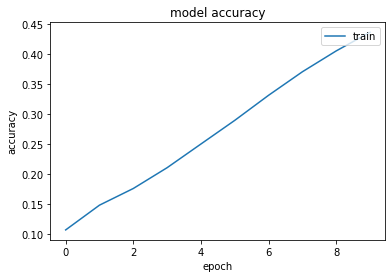

In [22]:
# visualization of behaviour based on its accuracy

plt.plot(history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

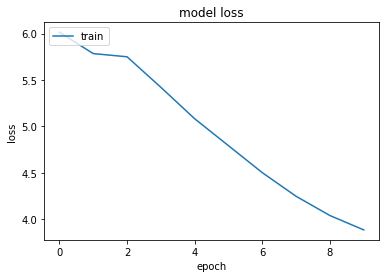

In [23]:
plt.plot(history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [24]:
#making prediction

def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("How are you ".lower())

how
are
you


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [27]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [28]:
#function for Prediction

In [29]:
def predict_completions(text,n=3):
    if text =="":
        return("0")
    x=prepare_input(text)
    preds=model.predict(x,verbose=0)[0]
    next_indices = sample(preds,n)
    return [unique_words[idx] for idx in next_indices]

In [30]:
#Result

In [34]:
#1
q =  "Do your work by your own instead of depending on someone"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  Do your work by your own instead of depending on someone
Sequence:  do your work by your
do
your
work
by
your
next possible words:  ['own', 'good', 'case', 'time', 'experience']


In [38]:
#2
q=  "I had seen little of Holmes lately"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:4])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 3))

correct sentence:  I had seen little of Holmes lately
Sequence:  i had seen little
i
had
seen
little
next possible words:  ['of', 'in', 'more']


In [43]:
#3
q=  " It is a capital mistake to theorise before one has data"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 4))

correct sentence:   It is a capital mistake to theorise before one has data
Sequence:  it is a capital mistake
it
is
a
capital
mistake
next possible words:  ['to', 'and', 'in', 'said']


In [ ]:
#Thank You